In [10]:
from collections import defaultdict
import boto3
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from collections import Counter

In [11]:
# Get data
def read_file(filename):
    f = open(filename)
    l = f.read().splitlines()
    return l

def filter_data(e_data, hits):
    e_data = e_data[e_data.hitid.isin(hits)]
    e_data = e_data[e_data.status.isin([4, 5, 7])]
    return e_data

exp_name = "rsd333_main2" #"rsd333_p2" #"riskychoice_p1"
hit_ids = read_file(f"exp_data/{exp_name}.txt")
data = pd.read_csv(f"exp_data/{exp_name}.csv")
cr_data = pd.read_csv(f"exp_data/{exp_name}cr.csv")
data = filter_data(data, hit_ids)
data = data[~data.endhit.isnull()]
print(len(data))
data2 = data[['beginhit', 'endhit', 'datastring']]

379


In [12]:
def get_datastring(row):
    return json.loads(row.datastring)

def parse_data(data):
    data['datastring'] = data.apply(get_datastring, axis=1)
    return data

In [13]:
worker_ids = set(data['workerid'].values)
cr_worker_ids = set(cr_data['AmazonIdentifier'].values) # Get this list from cloudresearch

In [14]:
data = data[data.workerid.isin(cr_worker_ids)]

In [15]:
print(len(data))

357


In [16]:
data = parse_data(data)
display(data)

,uniqueid,assignmentid,workerid,hitid,ipaddress,browser,platform,language,cond,counterbalance,codeversion,beginhit,beginexp,endhit,bonus,status,mode,datastring
1,A3FDSQADGUY42E:3X31TUMD7YTTIS4MVD848JF9NHM1LQ,3X31TUMD7YTTIS4MVD848JF9NHM1LQ,A3FDSQADGUY42E,3OWZNK3RYLW13JCIXSVHF5P5I51U2I,10.37.45.221,edge,windows,UNKNOWN,0,0,final_four_exp,2020-10-05 14:03:01.73182,2020-10-05 14:05:27.734788,2020-10-05 14:13:44.639279,0,4,live,"{'condition': 0, 'counterbalance': 0, 'assignm..."
2,A3H17JEGNZNHZ:3U5JL4WY5LG5ALIUWEUUHBHZ6A64XS,3U5JL4WY5LG5ALIUWEUUHBHZ6A64XS,A3H17JEGNZNHZ,3CESM1J3EIA2DOKOFUMLN6REJQEW60,10.11.171.245,chrome,windows,UNKNOWN,3,0,final_four_exp,2020-10-05 14:05:42.13298,2020-10-05 14:07:57.765483,2020-10-05 14:15:41.67142,0,4,live,"{'condition': 3, 'counterbalance': 0, 'assignm..."
3,A16M8QAZBLK2OW:32XVDSJFP04KDV43ET9XDF43FTS2ME,32XVDSJFP04KDV43ET9XDF43FTS2ME,A16M8QAZBLK2OW,3SD15I2WD215MQI05ABJI9GHLXK634,10.14.108.58,chrome,windows,UNKNOWN,2,0,final_four_exp,2020-10-05 14:17:59.765717,2020-10-05 14:26:26.821577,2020-10-05 14:38:08.101896,0,4,live,"{'condition': 2, 'counterbalance': 0, 'assignm..."
4,A1CSEHUXXME2F9:31QNSG6A5S0CE7Z5Q4G94OKG63J874,31QNSG6A5S0CE7Z5Q4G94OKG63J874,A1CSEHUXXME2F9,3CRWSLD91KBWXIWEBO2SV8BE6OUOMQ,10.11.191.99,chrome,windows,UNKNOWN,0,0,final_four_exp,2020-10-05 14:09:31.431522,2020-10-05 14:11:24.898275,2020-10-05 14:18:20.131439,0,4,live,"{'condition': 0, 'counterbalance': 0, 'assignm..."
6,A3535BGYFACXQP:3NXNZ5RS1B4CSCIFVWMN4KFRQA6971,3NXNZ5RS1B4CSCIFVWMN4KFRQA6971,A3535BGYFACXQP,3KVQ0UJWPXS6UKKAABCGV0DENV3W5K,10.15.154.196,chrome,windows,UNKNOWN,3,0,final_four_exp,2020-10-05 14:15:43.540203,2020-10-05 14:17:51.447748,2020-10-05 14:24:23.112925,0,4,live,"{'condition': 3, 'counterbalance': 0, 'assignm..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,AK0685GQJ6ABK:3VNL7UK1XGQ8RK6ZBLPGJCTKI4EFTV,3VNL7UK1XGQ8RK6ZBLPGJCTKI4EFTV,AK0685GQJ6ABK,3OWZNK3RYLW13JCIXSVHF5P5I51U2I,10.10.88.48,chrome,windows,UNKNOWN,3,0,final_four_exp,2020-10-05 12:48:30.059875,2020-10-05 12:57:30.814769,2020-10-05 13:07:18.545089,0,4,live,"{'condition': 3, 'counterbalance': 0, 'assignm..."
484,A1I3CXC17NIRWB:3AWETUDC93ZONNHOILKJ8X7TJSVZIP,3AWETUDC93ZONNHOILKJ8X7TJSVZIP,A1I3CXC17NIRWB,38EHZ67RIMZ855FGN5PKQZ2CF23MG1,10.12.135.75,chrome,windows,UNKNOWN,2,0,final_four_exp,2020-10-05 13:11:41.50054,2020-10-05 13:18:09.602315,2020-10-05 13:28:48.528798,0,4,live,"{'condition': 2, 'counterbalance': 0, 'assignm..."
485,A3CIBH32B5568:3G2UL9A02ELPATGHXPJBKAOP08S67F,3G2UL9A02ELPATGHXPJBKAOP08S67F,A3CIBH32B5568,33N1S8XHHMSB0XOWKBUBREUFSH2Z1V,10.35.65.206,firefox,windows,UNKNOWN,1,0,final_four_exp,2020-10-05 13:37:53.695559,2020-10-05 13:43:43.626157,2020-10-05 13:53:23.937893,0,4,live,"{'condition': 1, 'counterbalance': 0, 'assignm..."
486,AALP4034U041N:35K3O9HUACK621O2LQ0LKQTJFUVFE9,35K3O9HUACK621O2LQ0LKQTJFUVFE9,AALP4034U041N,3XDJY5RK5SSB6XR516E58KM32JXU4E,10.34.14.131,chrome,macos,UNKNOWN,3,0,final_four_exp,2020-10-05 13:14:25.246166,2020-10-05 13:24:39.396319,2020-10-05 13:36:11.762667,0,4,live,"{'condition': 3, 'counterbalance': 0, 'assignm..."


In [17]:
ages = []
genders = []
import ast
for index in data.index:
    for t_data in data.loc[index]["datastring"]["data"]:
        if "responses" in t_data["trialdata"]:
            resp = ast.literal_eval(t_data["trialdata"]["responses"])
            if "Q1" in resp:
                try:
                    age = int(resp["Q1"])
                    ages.append(age)
                except Exception as e:
                    print(e)
                gender = resp["Q2"]
                genders.append(gender)
                
print(ages, genders)
ages += [22, 24] #Because of written text
print(Counter(genders))
print(np.mean(ages), np.min(ages), np.max(ages))
print(np.sort(ages))

invalid literal for int() with base 10: 'my age is 22'
invalid literal for int() with base 10: 'Yes - I tried my best to obtain the maximum score'
invalid literal for int() with base 10: 'I am 24 years of age.'
invalid literal for int() with base 10: ''
[40, 41, 58, 23, 30, 35, 39, 36, 27, 29, 34, 48, 31, 28, 48, 36, 20, 49, 42, 26, 25, 58, 42, 62, 21, 27, 40, 30, 30, 26, 23, 54, 33, 49, 60, 46, 45, 30, 22, 50, 27, 56, 26, 32, 40, 39, 51, 21, 31, 57, 73, 22, 26, 45, 30, 24, 35, 37, 27, 30, 58, 58, 35, 41, 39, 57, 34, 25, 55, 25, 21, 24, 32, 26, 34, 54, 36, 31, 33, 26, 26, 33, 31, 43, 29, 51, 22, 22, 25, 27, 27, 50, 34, 57, 33, 37, 19, 21, 44, 24, 45, 23, 34, 51, 24, 21, 19, 29, 25, 49, 61, 33, 25, 40, 26, 28, 35, 37, 59, 29, 63, 30, 66, 30, 35, 39, 45, 68, 24, 22, 54, 33, 22, 42, 28, 20, 41, 58, 27, 25, 38, 32, 30, 49, 21, 41, 33, 56, 33, 21, 30, 35, 24, 37, 23, 30, 30, 41, 28, 26, 35, 28, 25, 38, 37, 31, 36, 27, 47, 27, 24, 24, 20, 21, 44, 33, 42, 56, 34, 48, 43, 24, 48, 27, 32, 28, 7

In [18]:
print(data.loc[1]["datastring"])

{'condition': 0, 'counterbalance': 0, 'assignmentId': '3X31TUMD7YTTIS4MVD848JF9NHM1LQ', 'workerId': 'A3FDSQADGUY42E', 'hitId': '3OWZNK3RYLW13JCIXSVHF5P5I51U2I', 'currenttrial': 41, 'bonus': 0, 'data': [{'uniqueid': 'A3FDSQADGUY42E:3X31TUMD7YTTIS4MVD848JF9NHM1LQ', 'current_trial': 0, 'dateTime': 1601906601670, 'trialdata': {'view_history': '[{"page_index":0,"viewing_time":2324},{"page_index":1,"viewing_time":12778},{"page_index":2,"viewing_time":9734},{"page_index":3,"viewing_time":12488}]', 'rt': 37326, 'trial_type': 'instructions', 'trial_index': 0, 'time_elapsed': 37338, 'internal_node_id': '0.0-0.0-0.0'}}, {'uniqueid': 'A3FDSQADGUY42E:3X31TUMD7YTTIS4MVD848JF9NHM1LQ', 'current_trial': 1, 'dateTime': 1601906629038, 'trialdata': {'rt': 26352, 'questions': '["What is the range of node values?","What is the cost of clicking on a node to find out its value?","Will each round be the same?","If you find a big negative reward while inspecting a node, then "]', 'responses': '["$-48 to $48","$

In [19]:
def extract_trial_data(df):
    p_scores = []
    p_st = []
    p_trial_actions = []
    p_envs = []
    p_thetas = []
    p_theta_hats = []
    p_conds = []
    for i, d in df.iterrows():
        p_thetas.append(d['datastring']['questiondata']['random_theta_condition'])
        p_theta_hats.append(d['datastring']['questiondata']['theta_hat_condition'])
        p_conds.append(d['datastring']['questiondata']['condition'])
        scores = []
        survey_texts = []
        trial_actions = []
        envs = []
        dat = d["datastring"]["data"]
        for k in dat:
            z = k["trialdata"]
            if z['trial_type'] == 'survey-text':
                survey_texts.append(z)
            if "block" in z:
                if z["block"] == "test_main":
                    actions = [int(q) for q in z["queries"]["click"]["state"]["target"]] + [0]
                    envs.append([0] + [int(e) for e in z["stateRewards"][1:]])
                    s = z['score']
                    scores.append(s)
                    trial_actions.append(actions)
        p_scores.append(np.array(scores))
        p_st.append(survey_texts)
        p_envs.append(envs)
        p_trial_actions.append(trial_actions)
    df['scores'] = p_scores
    df['survey-texts'] = p_st
    df['envs'] = p_envs
    df['trial_actions'] = p_trial_actions
    df['condition'] = p_conds
    df['theta'] = p_thetas
    df['theta_hat'] = p_theta_hats
    return df

def remove_inattentive_participants(df):
    ind_to_remove = []
    for i, d in df.iterrows():
        trial_actions = d['trial_actions']
        len_trials = [len(actions) for actions in trial_actions]
        counts = Counter(len_trials)
        if counts[1] > len(trial_actions)/2:
            ind_to_remove.append(i)
    df.drop(ind_to_remove, inplace=True)
    print(len(df))
    return df

In [20]:
def extract_condition(row):
    return row["datastring"]["condition"]
#data['condition'] = data.apply(extract_condition, axis=1)

In [21]:
ids_to_remove = ['A1Y20U06K7MPOR', 'A3GTPVKVLQ1605', 'A1HTD3WLVYWRWY', 'A1GYD62XNQT0O5', 'A28OGF1KGFBYU8', 'A4CGTBR8EV4MF',
                 'AY1HKCCJXKXTR', 'AV82XILD9BG1E', 'A32AI8EFFND8M6', 'A1RGMB63HH1G6D', 'A6VEBZOL6ZSXB', 'A1A8X4ITIX46BU',
                 'AHA0PGTK8TPFF', 'AKYL287SLVNIA', 'A1KLDR1X8EBXWS'] #based on survey answer
                 

In [22]:
data = data[~data.workerid.isin(ids_to_remove)]
print(len(data))

342


In [23]:
data = extract_trial_data(data)

In [24]:
n =0
c =0
optimal_scores = defaultdict(lambda : defaultdict())
optimal_actions = defaultdict(lambda : defaultdict())
for theta_hat in range(6):
    print(theta_hat)
    df = pd.read_csv(f"experiment_data/bmps_posterior_csvs/newout{theta_hat}.csv")
    for index, row in df.iterrows():
        c += 1
        ground_truth = ast.literal_eval(row['groundtruth'])
        optimal_scores[theta_hat][frozenset(ground_truth)] = row['return']
        actions = ast.literal_eval(row['action'])
        optimal_actions[theta_hat][ground_truth] = actions
        n+= len(actions)-1
print(n/c)
mean_clicks = n/c

0
1
2
3
4
5
5.342989522895187


In [25]:
p_theta_hats = data.theta_hat
p_thetas = data.theta
p_trial_scores = data.scores
p_envs = data.envs
p_conds = data.condition
def get_max_return(env):
    max_r = 0
    for i in range(3):
        max_r += max(env[3*i + 1: 3*i+4])
    return max_r

In [26]:
mean_rewards = defaultdict(list)
mean_mean_rewards = defaultdict(list)
optimal_condition_rewards = defaultdict(list)
diff_p_trial_scores = []
optimal_p_trial_scores = []
reward_trial_scores = []
for theta_hat, envs, sc in zip(p_theta_hats, p_envs, p_trial_scores):
    diff_trial_scores = []
    optimal_trial_scores = []
    t_trial_scores = []
    for env, s in zip(envs, sc):
        optimal_score = get_max_return(env) - mean_clicks
        temp = optimal_score - s
        diff_trial_scores.append(temp)
        optimal_trial_scores.append(optimal_score)
        t_trial_scores.append(s)
    diff_p_trial_scores.append(diff_trial_scores)
    optimal_p_trial_scores.append(optimal_trial_scores)
    reward_trial_scores.append(t_trial_scores)
optimal_rewards = defaultdict(list)

In [27]:
ratio_rewards = defaultdict(list)
score_rewards = defaultdict(list)
for c, test_r, op_r, t_r in zip(p_conds, diff_p_trial_scores, optimal_p_trial_scores, reward_trial_scores):
    mean_rewards[c].append(np.sum(test_r))
    mean_mean_rewards[c].append(np.mean(test_r))
    optimal_rewards[c].append(np.sum(op_r))
    ratio_rewards[c].append(np.sum(test_r)/np.sum(op_r))
    score_rewards[c].append(np.mean(t_r))

In [54]:
ratio_data = []
condition_map = {0: 'Control condition \nwith practice', 1: 'Non-robust \nTutor', 2: 'Robust\nTutor', 3: 'Control condition \nwithout practice'}
for condition in [3, 0, 1, 2]:
    for v in ratio_rewards[condition]:
        ratio_data.append([condition_map[condition], 1-v])
ratio_df = pd.DataFrame(ratio_data, columns = ['condition', 'suboptimality'])

In [55]:
import os
os.environ['PATH'] += os.pathsep + '/usr/local/texlive/2020/bin/x86_64-darwin'
print(os.environ['PATH'])

//anaconda3/envs/cogtut/bin:/Users/yjain/anaconda3/condabin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/usr/local/texlive/2020/bin/x86_64-darwin:/usr/local/texlive/2020/bin/x86_64-darwin:/usr/local/texlive/2020/bin/x86_64-darwin:/usr/local/texlive/2020/bin/x86_64-darwin:/usr/local/texlive/2020/bin/x86_64-darwin:/usr/local/texlive/2020/bin/x86_64-darwin


In [67]:
display(ratio_df)
display(ratio_df.groupby('condition')['suboptimality'].mean())

,condition,suboptimality
0,Control condition \nwithout practice,0.911934
1,Control condition \nwithout practice,0.872075
2,Control condition \nwithout practice,0.559357
3,Control condition \nwithout practice,0.828380
4,Control condition \nwithout practice,0.051664
...,...,...
337,Robust\nTutor,0.596893
338,Robust\nTutor,0.037692
339,Robust\nTutor,0.810103
340,Robust\nTutor,0.712263


condition
Control condition \nwith practice       0.567097
Control condition \nwithout practice    0.475285
Non-robust \nTutor                      0.568224
Robust\nTutor                           0.751560
Name: suboptimality, dtype: float64

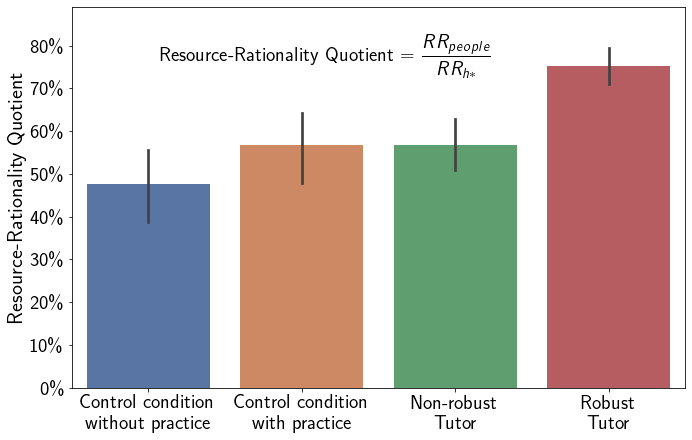

In [65]:
plt.figure(figsize=(11, 7))
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = [r'\usepackage{sansmath}', r'\sansmath', r'\usepackage{amsmath}', r'\usepackage[dvips]{graphicx}\usepackage{xfrac}']
ax = plt.axes()
sns.set_palette('deep')
sns.barplot(x = 'condition', y=r'suboptimality', data=ratio_df)
plt.xlabel("", fontsize=24)
plt.ylabel(r"Resource-Rationality Quotient", fontsize=21.5)
plt.tick_params('both', labelsize=20)
vals = ax.get_yticks()
plt.ylim(top = 0.89)
ax.annotate(r'Resource-Rationality Quotient = $\dfrac{RR_{people}}{RR_{h*}}$', xy=(420, 350), xycoords='axes points',
            size=20, ha='right', va='top',
            #bbox=dict(boxstyle='round', fc='w')
           )
# ax.annotate(r'Resource-Rationality Quotient = $\underline{RR_{people}}$', xy=(420, 316), xycoords='axes points',
#             size=20, ha='right', va='top',
#             #bbox=dict(boxstyle='round', fc='w')
#           )
y_ticks = [str(int(100*x))+"\%" for x in vals]
ax.set_yticklabels(y_ticks)
plt.savefig("resource-rationality2.pdf", bbox_inches='tight', dpi=400)

In [68]:
no_demo_df = data[data.condition == 0]
non_robust_df = data[data.condition == 1]
robust_df = data[data.condition == 2]
low_trial_no_demo_df = data[data.condition == 3]

In [69]:
# TODO: Remove inattentive participants
# Steps:
# 1. Manually remove participants who said no in the last answer
# 2. Remove participants who clicked nothing in more than half the trials
# 3. Remove based on quiz attempts?
# 4. Remove based on rt

no_demo_df = remove_inattentive_participants(no_demo_df)
non_robust_df = remove_inattentive_participants(non_robust_df)
robust_df = remove_inattentive_participants(robust_df)
low_trial_no_demo_df = remove_inattentive_participants(low_trial_no_demo_df)

74
84
80
67


/anaconda3/envs/cogtut/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


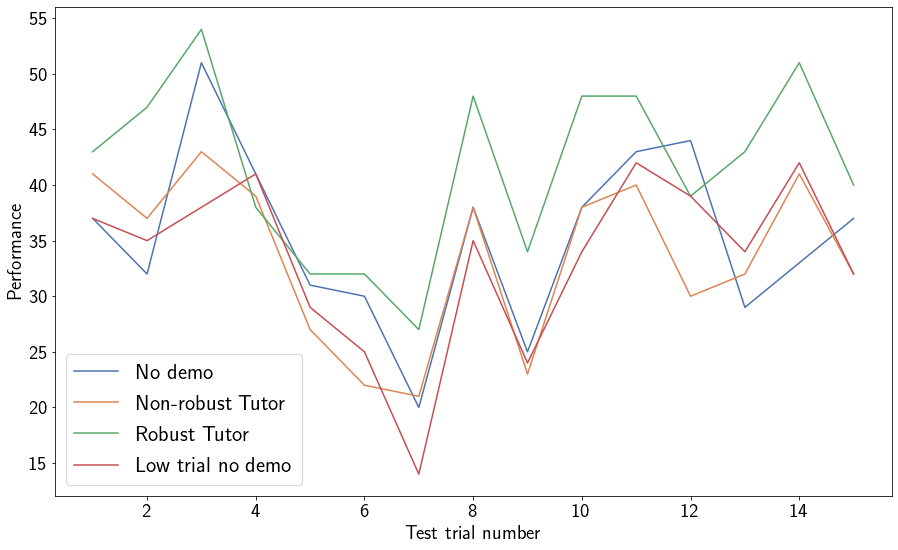

In [70]:
no_demo_scores = np.mean(no_demo_df['scores'].values, axis=0)
non_robust_scores = np.mean(non_robust_df['scores'].values, axis=0)
robust_scores = np.mean(robust_df['scores'].values, axis=0)
low_trial_no_demo_scores = np.mean(low_trial_no_demo_df['scores'].values, axis=0)

plt.figure(figsize=(15, 9))
plt.plot(range(1, 16), no_demo_scores, label='No demo')
plt.plot(range(1, 16), non_robust_scores, label='Non-robust Tutor')
plt.plot(range(1, 16), robust_scores, label='Robust Tutor')
plt.plot(range(1, 16), low_trial_no_demo_scores, label='Low trial no demo')
plt.legend(fontsize=22)
plt.xlabel("Test trial number", fontsize=20)
plt.ylabel("Performance", fontsize=20)
plt.tick_params(labelsize=20)

In [71]:
no_demo_mean = np.mean(no_demo_scores)
non_robust_mean = np.mean(non_robust_scores)
robust_mean = np.mean(robust_scores)
low_trial_no_demo_mean = np.mean(low_trial_no_demo_scores)
print(no_demo_mean, non_robust_mean, robust_mean, low_trial_no_demo_mean)

35.266666666666666 33.6 41.6 33.4


In [72]:
# Getting participant wise average scores
no_demo_av_scores = [np.mean(S) for S in no_demo_df['scores'].values]
non_robust_av_scores = [np.mean(S) for S in non_robust_df['scores'].values]
robust_av_scores = [np.mean(S) for S in robust_df['scores'].values]
lt_no_demo_av_scores = [np.mean(S) for S in low_trial_no_demo_df['scores'].values]

print("No-demo:", np.round(np.mean(no_demo_av_scores), 4), "std:", np.round(np.std(no_demo_av_scores), 4))
print("Non-robust:", np.round(np.mean(non_robust_av_scores),4), "std:", np.round(np.std(non_robust_av_scores), 4))
print("Robust:", np.round(np.mean(robust_av_scores), 4), "std:", np.round(np.std(robust_av_scores), 4))
print("Low trial no demo:", np.round(np.mean(lt_no_demo_av_scores), 4), "std:", np.round(np.std(lt_no_demo_av_scores), 4))

No-demo: 35.6477 std: 18.0837
Non-robust: 34.0881 std: 16.1927
Robust: 42.0925 std: 13.7679
Low trial no demo: 33.804 std: 16.6376


In [73]:
print(np.std(no_demo_av_scores))

18.083687737699606


In [74]:
from scipy.stats import shapiro

for s in [no_demo_av_scores, non_robust_av_scores, robust_av_scores, lt_no_demo_av_scores]:
    print(len(s)-1)
    print(shapiro(s))

73
(0.9662132859230042, 0.04495179280638695)
83
(0.9776594638824463, 0.15210594236850739)
79
(0.9828335046768188, 0.35960593819618225)
66
(0.9661759734153748, 0.06505358964204788)


In [75]:
from scipy.stats import f_oneway
print(f_oneway(no_demo_av_scores, non_robust_av_scores, robust_av_scores, lt_no_demo_av_scores))

F_onewayResult(statistic=4.432648099861358, pvalue=0.004563481048149338)


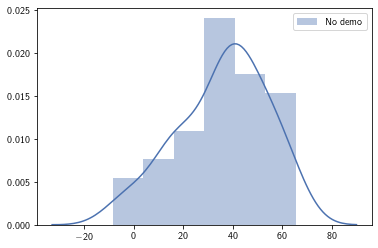

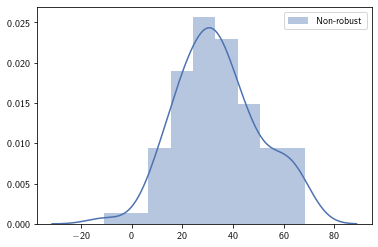

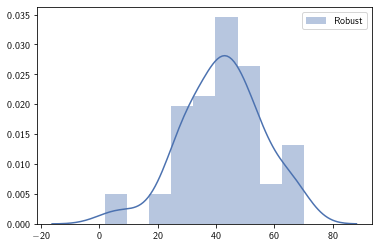

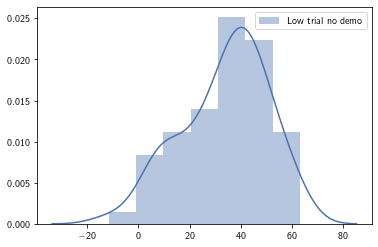

In [76]:
import seaborn as sns
plt.figure()
sns.distplot(no_demo_av_scores, label='No demo')
plt.legend()
plt.figure()
sns.distplot(non_robust_av_scores, label='Non-robust')
plt.legend()
plt.figure()
sns.distplot(robust_av_scores, label='Robust')
plt.legend()
plt.figure()
sns.distplot(lt_no_demo_av_scores, label='Low trial no demo')
plt.legend()

In [77]:
from scipy.stats import ttest_ind
def cohend(l1, l2):
    pooled_std = np.sqrt(((np.std(l1)**2) + np.std(l2)**2)/2)
    return (np.mean(l1) - np.mean(l2))/pooled_std

# t-tests
# No-demo vs Non-robust
print("# No-demo vs Non-robust")
t, p = ttest_ind(no_demo_av_scores, non_robust_av_scores)
print(np.round(t, 2), np.round(p/2, 4))
print(f"Cohen's d={np.round(cohend(no_demo_av_scores, non_robust_av_scores), 3)}")
# No-demo vs Robust
print("# No-demo vs Robust")
t, p = ttest_ind(no_demo_av_scores, robust_av_scores)
print(np.round(t, 2), np.round(p/2, 4))
print(f"Cohen's d={np.round(cohend(no_demo_av_scores, robust_av_scores), 3)}")
# Non-robust vs Robust
print("# Non-robust vs Robust")
t, p = ttest_ind(non_robust_av_scores, robust_av_scores)
print(np.round(t, 2), np.round(p/2, 4))
print(f"Cohen's d={np.round(cohend(non_robust_av_scores, robust_av_scores), 3)}")

# low trial no-demo vs Non-robust
print("# low trial no-demo vs Non-robust")
t, p = ttest_ind(lt_no_demo_av_scores, non_robust_av_scores)
print(np.round(t, 2), np.round(p/2, 4))
print(f"Cohen's d={np.round(cohend(lt_no_demo_av_scores, non_robust_av_scores), 3)}")
# low trial no-demo vs Robust
print("# low trial no-demo vs Robust")
t, p = ttest_ind(lt_no_demo_av_scores, robust_av_scores)
print(np.round(t, 2), np.round(p/2, 4))
print(f"Cohen's d={np.round(cohend(lt_no_demo_av_scores, robust_av_scores), 3)}")
# low trial no demo vs no demo
print("# low trial no demo vs no demo")
t, p = ttest_ind(lt_no_demo_av_scores, no_demo_av_scores)
print(np.round(t, 2), np.round(p/2, 4))
print(f"Cohen's d={np.round(cohend(lt_no_demo_av_scores, no_demo_av_scores), 3)}")

# No-demo vs Non-robust
0.57 0.2853
Cohen's d=0.091
# No-demo vs Robust
-2.48 0.0071
Cohen's d=-0.401
# Non-robust vs Robust
-3.38 0.0005
Cohen's d=-0.533
# low trial no-demo vs Non-robust
-0.11 0.4582
Cohen's d=-0.017
# low trial no-demo vs Robust
-3.28 0.0006
Cohen's d=-0.543
# low trial no demo vs no demo
-0.62 0.267
Cohen's d=-0.106


### Wilcoxon-rank sum tests

In [78]:
from scipy.stats import ranksums
print("# No-demo vs Non-robust")
st, p = ranksums(no_demo_av_scores, non_robust_av_scores)
print("statistic:", np.round(st, 2), "p-value:", np.round(p, 4))
print("# No-demo vs Robust")
st, p = ranksums(no_demo_av_scores, robust_av_scores)
print("statistic:", np.round(st, 2), "p-value:", np.round(p, 4))
print("# Non-robust vs Robust")
st, p = ranksums(non_robust_av_scores, robust_av_scores)
print("statistic:", np.round(st, 2), "p-value:", np.round(p, 4))

print("# low trial no-demo vs Non-robust")
st, p = ranksums(lt_no_demo_av_scores, non_robust_av_scores)
print("statistic:", np.round(st, 2), "p-value:", np.round(p, 4))
print("# low trial no-demo vs Robust")
st, p = ranksums(lt_no_demo_av_scores, robust_av_scores)
print("statistic:", np.round(st, 2), "p-value:", np.round(p, 4))
print("# low trial no demo vs no demo")
st, p = ranksums(lt_no_demo_av_scores, no_demo_av_scores)
print("statistic:", np.round(st, 2), "p-value:", np.round(p, 4))

# No-demo vs Non-robust
statistic: 1.05 p-value: 0.2951
# No-demo vs Robust
statistic: -1.98 p-value: 0.0473
# Non-robust vs Robust
statistic: -3.5 p-value: 0.0005
# low trial no-demo vs Non-robust
statistic: 0.49 p-value: 0.6224
# low trial no-demo vs Robust
statistic: -2.84 p-value: 0.0045
# low trial no demo vs no demo
statistic: -0.7 p-value: 0.4854


In [48]:
import json
def get_bonus(row):
    questiondata = json.loads(row.datastring)["questiondata"]
    if "bonus" in questiondata:
        final_bonus = questiondata["bonus"]
    else:
        final_bonus = questiondata["final_bonus"]
    return final_bonus
data['final_bonus'] = data.apply(get_bonus, axis=1).round(2)

TypeError: the JSON object must be str, bytes or bytearray, not dict

In [139]:
data2['final_bonus'] = data2.apply(get_bonus, axis=1).round(2)

In [140]:
data2['beginhit'] = data2['beginhit'].astype('datetime64[ns]') 
data2['endhit'] = data2['endhit'].astype('datetime64[ns]')
data2['timediff'] = (data2['endhit'] - data2['beginhit']).dt.total_seconds()
#del data2['datastring']
display(data2.sort_values('beginhit'))
print(len(data2))

,beginhit,endhit,datastring,final_bonus,timediff
438,2020-10-05 11:02:01.459223,2020-10-05 11:13:01.907809,"{""condition"": 2, ""counterbalance"": 0, ""assignm...",2.36,660.448586
443,2020-10-05 11:02:42.273266,2020-10-05 11:13:49.421319,"{""condition"": 3, ""counterbalance"": 0, ""assignm...",2.16,667.148053
421,2020-10-05 11:03:40.889977,2020-10-05 11:11:18.723925,"{""condition"": 3, ""counterbalance"": 0, ""assignm...",0.91,457.833948
440,2020-10-05 11:03:52.121838,2020-10-05 11:23:13.802604,"{""condition"": 0, ""counterbalance"": 0, ""assignm...",1.78,1161.680766
441,2020-10-05 11:04:51.537787,2020-10-05 11:28:27.876359,"{""condition"": 2, ""counterbalance"": 0, ""assignm...",3.26,1416.338572
...,...,...,...,...,...
391,2020-10-07 01:22:51.832412,2020-10-07 01:38:29.408083,"{""condition"": 1, ""counterbalance"": 0, ""assignm...",1.49,937.575671
394,2020-10-07 01:25:24.195177,2020-10-07 01:40:28.040137,"{""condition"": 0, ""counterbalance"": 0, ""assignm...",2.13,903.844960
393,2020-10-07 01:25:47.233153,2020-10-07 01:39:09.598547,"{""condition"": 2, ""counterbalance"": 0, ""assignm...",2.15,802.365394
395,2020-10-07 02:08:19.834420,2020-10-07 02:21:56.728613,"{""condition"": 0, ""counterbalance"": 0, ""assignm...",1.33,816.894193


379


In [141]:
data2['timediff'].mean()

901.2953711583115